# Homework 5

## REST API

We import the necessary modules and initialize the url variable.

In [1]:
import requests 
from bs4 import BeautifulSoup as bs

url = 'https://www.nobelprize.org/organization/developer-zone-2/'
r = requests.get(url)
r.headers['Content-Type']

'text/html; charset=UTF-8'

The webpage is in html so we locate the links to the API:s. We do this by using regex and searching the <a> tags for href attributes with the prefix https://. After a couple tries of adding search expressions we arrive at a single adress.

In [2]:
import re
html = bs(r.content)
regex = re.compile(r'(https://).*(api).*(Prizes)')
filtered_atags = html.find("a", attrs={'href' : regex}).string
filtered_atags

'https://api.nobelprize.org/2.1/nobelPrizes'

We repeat the initial process and see that the content is in JSON format.

In [3]:
url = 'https://api.nobelprize.org/2.1/nobelPrizes'
r = requests.get(url)
r.headers['Content-Type']

'application/json;charset=utf-8'

We now proceed to retrieve the contents. we create a list to hold the motivations and iterate over the objects in the list variable nobel_prizes. If the category is physics then we append the motivation to our motivations list.

In [4]:
content = r.json()
nobel_prizes = content['nobelPrizes']
#print(nobel_prizes)
motivations = []
for listob in nobel_prizes:
    if listob['category']['en'] == 'Physics':
        motivations.append(listob['laureates'][0]['motivation']['en'])
motivations

['in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him',
 'in recognition of the extraordinary service they rendered by their researches into the influence of magnetism upon radiation phenomena',
 'in recognition of the extraordinary services he has rendered by his discovery of spontaneous radioactivity',
 'for his investigations of the densities of the most important gases and for his discovery of argon in connection with these studies',
 'for his work on cathode rays']

To make a wordcould we import the modules and extract all unique words from the motivations.

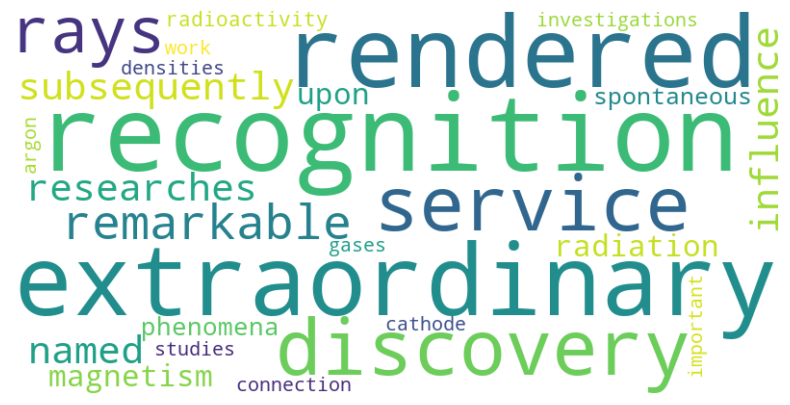

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = [word for motivation in motivations for word in motivation.split()]
words_string = ' '.join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Web scraper

We start by initializing the url and creating a BeautifulSoup object. When then proceed to get an overview of the front page.

In [6]:
url = 'https://books.toscrape.com/'
r = requests.get(url)
html = bs(r.content)
html

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

After inspecting the website it seems all the info we are interested in, is located at the page dedicated to each book. Hence we want to get access to each such hyperlink. We can also see from the hml code that each book has its own tag \<article>. So we use that in order to locate the correct link. First we want find a way to do this for a single article and find that we can specify the attribute of the anchor tag.

In [7]:
article = html.find(name='article')
article_link = article.find(name='a')['href']
article_link

'catalogue/a-light-in-the-attic_1000/index.html'

Now we want to do this for all articles on the page and so we create a function to achieve that. Here url argument specifies the url to find the articles and base_url is simply "https://books.toscrape.com/". This is neccessary in order to get the article url:s correct.

In [8]:
def get_all_links(url):
    links = []
    r = requests.get(url)
    html = bs(r.content)
    articles = html.find_all(name='article')
    for article in articles:
        base_url = 'https://books.toscrape.com/catalogue/'
        links.append(base_url + article.find('a')['href'])
    return links

get_all_links('https://books.toscrape.com/catalogue/page-1.html')

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

We now want to use the links to get to the article page and retrieve the info. We manually inspect the page of the first article in the browser aswell as the html code. 

In [9]:
url = 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'
r = requests.get(url)
html = bs(r.content)
html


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    A Light in the Attic | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. Th

From inspecting the code we see that the title appears early under the tag \<title> and so we proceed to extract it. Since the title comes with an additional part we use a little regex to separate the title. We then combine it all in the form of a function.

In [10]:
def get_title(html):
    title = html.find('title').string.strip()
    regex = r'^(.*)(?=\s\|)'
    clean_title = re.findall(regex, title)
    return clean_title[0]

get_title(html)

'A Light in the Attic'

We see from the page that theres a table containing the rest of the info we need except the star rating. Hence we look for the star rating in the html code and find it to be in a paragraph. After some additional trying and failing we finally get that "star-rating" and the actual rating are two separate items in a list and so we extract the rating from the list and store it as a variable. This also we make into a function.

In [11]:
def get_rating(html):
    rating = html.find_all('p')
    rating = rating[2]['class'][1]
    return rating

get_rating(html)

'Three'

We now analyze the structure of the table.

In [12]:
table = html.find_all(name='table')
table

[<table class="table table-striped">
 <tr>
 <th>UPC</th><td>a897fe39b1053632</td>
 </tr>
 <tr>
 <th>Product Type</th><td>Books</td>
 </tr>
 <tr>
 <th>Price (excl. tax)</th><td>£51.77</td>
 </tr>
 <tr>
 <th>Price (incl. tax)</th><td>£51.77</td>
 </tr>
 <tr>
 <th>Tax</th><td>£0.00</td>
 </tr>
 <tr>
 <th>Availability</th>
 <td>In stock (22 available)</td>
 </tr>
 <tr>
 <th>Number of reviews</th>
 <td>0</td>
 </tr>
 </table>]

Since we are only interested in some of the info in the table we create a function to iterate over the rows and extract only the wanted info.

In [13]:
def get_table_info(html):
    table = html.find(name='table')
    table_row = table.find_all('tr')
    for row in table_row:
        if row.find('th').string == 'UPC':
            upc = row.find('td').string
        elif row.find('th').string == 'Price (incl. tax)':
            price = row.find('td').string
    return upc, price

get_table_info(html)

('a897fe39b1053632', '£51.77')

We now have all tools we need to get the info we want from the page and so we proceed to create a higher order function to utilize all tools.

In [14]:
def scrape_article_info(article_link):
    r = requests.get(article_link)
    html = bs(r.content)
    upc, price = get_table_info(html)
    info_dict = {'upc' : upc,
                 'title' : get_title(html),
                 'price' : price,
                 'rating' : get_rating(html)}
    return info_dict

scrape_article_info('https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html')

{'upc': 'a897fe39b1053632',
 'title': 'A Light in the Attic',
 'price': '£51.77',
 'rating': 'Three'}

We continue to combine functions and now combine scrape_article_info() with get_all_links() in order to be able to scrape all books on a certain page.

In [15]:
def scrape_page(url):
    list_of_info_dicts = []
    article_links = get_all_links(url)
    for article_link in article_links:
        list_of_info_dicts.append(scrape_article_info(article_link))
    return list_of_info_dicts

scrape_page('https://books.toscrape.com/catalogue/page-1.html')

[{'upc': 'a897fe39b1053632',
  'title': 'A Light in the Attic',
  'price': '£51.77',
  'rating': 'Three'},
 {'upc': '90fa61229261140a',
  'title': 'Tipping the Velvet',
  'price': '£53.74',
  'rating': 'One'},
 {'upc': '6957f44c3847a760',
  'title': 'Soumission',
  'price': '£50.10',
  'rating': 'One'},
 {'upc': 'e00eb4fd7b871a48',
  'title': 'Sharp Objects',
  'price': '£47.82',
  'rating': 'Four'},
 {'upc': '4165285e1663650f',
  'title': 'Sapiens: A Brief History of Humankind',
  'price': '£54.23',
  'rating': 'Five'},
 {'upc': 'f77dbf2323deb740',
  'title': 'The Requiem Red',
  'price': '£22.65',
  'rating': 'One'},
 {'upc': '2597b5a345f45e1b',
  'title': 'The Dirty Little Secrets of Getting Your Dream Job',
  'price': '£33.34',
  'rating': 'Four'},
 {'upc': 'e72a5dfc7e9267b2',
  'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'price': '£17.93',
  'rating': 'Three'},
 {'upc': 'e10e1e165dc8be4a',
  'title': 'The Boys in the Boat: 

The final modification to the function will be the possibility to choose the specific number of pages to scrape. This means we have to return to analyzing the html code of the first page. We know from the browser page that the "next page button" sais next and also that it must be a hyperlink so we search for hyperlinks with the string "next". 

In [16]:
url = 'https://books.toscrape.com/'
r = requests.get(url)
html = bs(r.content)
next_page = html.find(name='a', string='next')['href']
next_page

'catalogue/page-2.html'

Judging from the link we can access any catalogue page by simply changing the number in the snippet. Hence we proceed to build a function to do just that.

In [17]:
def scrape_pages(number):
    final_list = []
    url = 'https://books.toscrape.com/'
    for number in range(1, number + 1):
        page = f'catalogue/page-{number}.html'
        final_list = final_list + scrape_page(url+page)
    return final_list
scrape_pages(3)

[{'upc': 'a897fe39b1053632',
  'title': 'A Light in the Attic',
  'price': '£51.77',
  'rating': 'Three'},
 {'upc': '90fa61229261140a',
  'title': 'Tipping the Velvet',
  'price': '£53.74',
  'rating': 'One'},
 {'upc': '6957f44c3847a760',
  'title': 'Soumission',
  'price': '£50.10',
  'rating': 'One'},
 {'upc': 'e00eb4fd7b871a48',
  'title': 'Sharp Objects',
  'price': '£47.82',
  'rating': 'Four'},
 {'upc': '4165285e1663650f',
  'title': 'Sapiens: A Brief History of Humankind',
  'price': '£54.23',
  'rating': 'Five'},
 {'upc': 'f77dbf2323deb740',
  'title': 'The Requiem Red',
  'price': '£22.65',
  'rating': 'One'},
 {'upc': '2597b5a345f45e1b',
  'title': 'The Dirty Little Secrets of Getting Your Dream Job',
  'price': '£33.34',
  'rating': 'Four'},
 {'upc': 'e72a5dfc7e9267b2',
  'title': 'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'price': '£17.93',
  'rating': 'Three'},
 {'upc': 'e10e1e165dc8be4a',
  'title': 'The Boys in the Boat: 

Now that we have a function to scrape the wanted info from the desired numberof pages we want to make use of that information and so we proceed to display the info in a nice table.

In [18]:
import pandas as pd
df = pd.DataFrame(scrape_pages(3))
df

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
5,f77dbf2323deb740,The Requiem Red,£22.65,One
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,1dfe412b8ac00530,The Black Maria,£52.15,One
